# Sensitivity analysis for Bayesian networks using credal networks

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.sideBySide(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

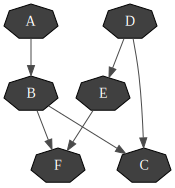


A:Range([0,1])
<> : [[0.305319 , 0.694681] , [0.303094 , 0.696906]]

B:Range([0,1])
<A:0> : [[0.18212 , 0.81788] , [0.133421 , 0.866579]]
<A:1> : [[0.703146 , 0.296854] , [0.703141 , 0.296859]]

C:Range([0,1])
<B:0|D:0> : [[0.876027 , 0.123972]]
<B:1|D:0> : [[0.670432 , 0.329568] , [0.670425 , 0.329575]]
<B:0|D:1> : [[0.451904 , 0.548096] , [0.451717 , 0.548283]]
<B:1|D:1> : [[0.427517 , 0.572483] , [0.42724 , 0.57276]]

D:Range([0,1])
<> : [[0.375043 , 0.624957] , [0.0311287 , 0.968871]]

E:Range([0,1])
<D:0> : [[0.541682 , 0.458318] , [0.541636 , 0.458364]]
<D:1> : [[0.445991 , 0.554009] , [0.445785 , 0.554215]]

F:Range([0,1])
<E:0|B:0> : [[0.733513 , 0.266487] , [0.73351 , 0.26649]]
<E:1|B:0> : [[0.450597 , 0.549403] , [0.450406 , 0.549594]]
<E:0|B:1> : [[0.207264 , 0.792736] , [0.0830243 , 0.916976]]
<E:1|B:1> : [[0.820561 , 0.179439] , [0.82056 , 0.17944]]




In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)

## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [4]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return f"<center><b>noise={beta}</b></center><br>{gnb.getInference(cr,engine=ielbp)}"

In [5]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add_html(showNoisy(bn,eps))
gnb.flow.display()